This notebook was just to play around with some rank filters. So far, this hasn't been used though.

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

from skimage import data
from skimage.filters.rank import (entropy, equalize, median, mean_bilateral, autolevel)
from skimage.morphology import disk
import numpy as np
from skimage import io
from pathlib import Path
from skimage.exposure import rescale_intensity
from skimage import (img_as_bool, img_as_ubyte)

In [3]:
def rescale_image(img, min_quant=0, max_quant=0.98): 
    #img = img * 1.0 # turn type to float before rescaling
    min_val = np.quantile(img, min_quant)
    max_val = np.quantile(img, max_quant)
    img = rescale_intensity(img, in_range=(min_val, max_val))
    return img

In [11]:
# Define paths and file names
point = "Point0006"
cycle = "cycle6"
channel = 3

file_img = Path(r"/links/groups/treutlein/DATA/imaging/PW/4i/plate14/aligned")/point/cycle/(point+"_"+cycle+".tif")
file_mask = Path(r"/links/groups/treutlein/USERS/pascal_noser/plate14_results/masks/version01")/(point+"_mask.png")
file_output = Path(r"/links/groups/treutlein/USERS/pascal_noser/plate14_results/unsharp_masking_test")/(point+"_unsharp_masking.png")

# Load images
img_channel = io.imread(str(file_img))[...,channel]
#img_mask = img_as_bool(io.imread(str(file_mask)))

# Rescaling
img_rescaled = rescale_image(img_channel)

# Crop image to speed up computations
img_small = img_rescaled[1550:2850, 2350:3650]

In [18]:
img_entropy = entropy(img_as_ubyte(img_channel), disk(50))

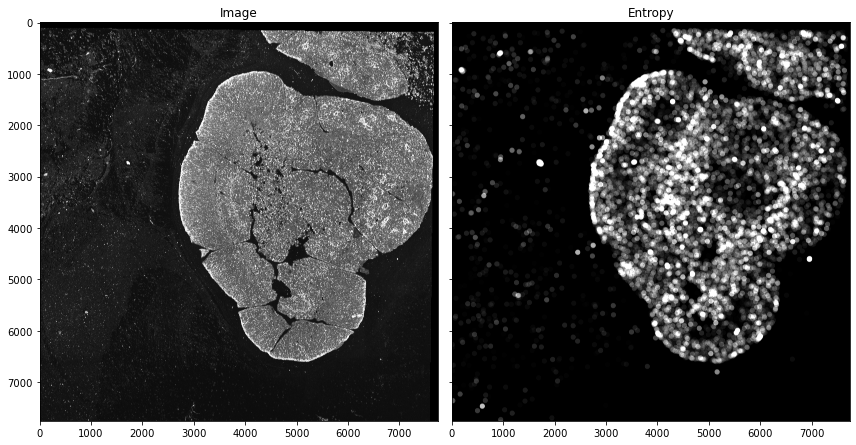

In [19]:
plt.close("all")
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(12, 6),
                               sharex=True, sharey=True)

img0 = ax0.imshow(img_as_ubyte(img_rescaled), cmap='gray')
ax0.set_title("Image")
#ax0.axis("off")

img1 = ax1.imshow(rescale_image(img_entropy), cmap='gray')
ax1.set_title("Entropy")
#ax1.axis("off")

fig.tight_layout()

plt.show()

In [45]:
plt.close("all")
fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(12, 4),
                               sharex=True, sharey=True)

img0 = ax0.imshow(img_as_ubyte(img_small), cmap=plt.cm.gray)
ax0.set_title("Image")
ax0.axis("off")

img1 = ax1.imshow(equalize(img_as_ubyte(img_small), disk(4)), cmap='gray')
ax1.set_title("Local equalise, 4")
ax1.axis("off")

img2 = ax2.imshow(equalize(img_as_ubyte(img_small), disk(50)), cmap='gray')
ax2.set_title("Local equalise, 25")
ax2.axis("off")

#fig.tight_layout()

plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [49]:
img_as_ubyte(img_small).dtype

dtype('uint8')

In [81]:
plt.close("all")
fig,ax = plt.subplots(1,3, figsize=(12,4), sharex=True, sharey=True)

ax[0].imshow(img_small)
ax[0].set_title("Image")
ax[0].set_axis_off()

d = 30
s_ax1 = 20
ax[1].imshow(mean_bilateral(img_as_ubyte(img_small), disk(d), s0=s_ax1, s1=s_ax1))
ax[1].set_title("Bilateral mean|disk = {}|s0,s1 = {}".format(d, s_ax1))
ax[1].set_axis_off()

s_ax2 = 40
ax[2].imshow(mean_bilateral(img_as_ubyte(img_small), disk(d), s0=s_ax2, s1=s_ax2))
ax[2].set_title("Bilateral mean|disk = {}|s0,s1 = {}".format(d, s_ax2))
ax[2].set_axis_off()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [82]:
plt.close("all")
fig,ax = plt.subplots(1,3, figsize=(12,4), sharex=True, sharey=True)

ax[0].imshow(img_small)
ax[0].set_title("Image")
ax[0].set_axis_off()

d_al = 5
ax[1].imshow(autolevel(img_as_ubyte(img_small), disk(d_al)))
ax[1].set_title("Autolevel|disk = {}".format(d_al))
ax[1].set_axis_off()

d_bm = 30
s = 40
ax[2].imshow(autolevel(mean_bilateral(img_as_ubyte(img_small), disk(d_bm), s0=s, s1=s), disk(d_al)))
ax[2].set_title("Autolevel(mean_bilateral)".format(d_bm, s))
ax[2].set_axis_off()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …